In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
weather = pd.read_csv('/content/weather_features.csv')
weather

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103890 entries, 0 to 103889
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               103890 non-null  object 
 1   city_name            103889 non-null  object 
 2   temp                 103889 non-null  float64
 3   temp_min             103889 non-null  float64
 4   temp_max             103889 non-null  float64
 5   pressure             103889 non-null  float64
 6   humidity             103889 non-null  float64
 7   wind_speed           103889 non-null  float64
 8   wind_deg             103889 non-null  float64
 9   rain_1h              103889 non-null  float64
 10  rain_3h              103889 non-null  float64
 11  snow_3h              103889 non-null  float64
 12  clouds_all           103889 non-null  float64
 13  weather_id           103889 non-null  float64
 14  weather_main         103889 non-null  object 
 15  weather_descripti

In [ ]:
weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [ ]:
weather.shape

(103890, 17)

In [ ]:
weather.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,103889.00,103889.00,103889.00,103889.00,103889.00,103889.00,103889.00,103889.00,103889.00,103889.00,103889.00,103889.00
mean,288.43,287.37,289.51,1014.99,67.66,2.37,165.43,0.07,0.00,0.01,28.83,755.79
std,8.12,8.11,8.32,14.97,22.49,2.20,122.05,0.30,0.01,0.29,32.04,112.97
min,264.13,264.13,264.13,927.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,282.32,281.15,283.15,1013.00,51.00,1.00,48.00,0.00,0.00,0.00,0.00,800.00
50%,287.83,287.15,289.15,1018.00,71.00,2.00,161.00,0.00,0.00,0.00,20.00,800.00
75%,294.15,293.15,295.15,1022.00,87.00,3.00,280.00,0.00,0.00,0.00,60.00,801.00
max,313.33,312.15,318.71,1087.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


In [ ]:
mean_weather = weather.groupby('city_name').mean()
mean_weather

<ipython-input-8-ac7c3d467dc9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_weather = weather.groupby('city_name').mean()


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city_name,,,,,,,,,,,,
Bilbao,286.307331,284.877495,287.911428,1017.437079,79.199064,1.943652,161.699664,0.131558,0.001144,0.025964,44.686455,721.030360
Madrid,288.061071,286.824877,289.155600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264
Valencia,290.780780,290.222277,291.355025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283


In [ ]:
weather.isnull().sum()

dt_iso                 0
city_name              1
temp                   1
temp_min               1
temp_max               1
pressure               1
humidity               1
wind_speed             1
wind_deg               1
rain_1h                1
rain_3h                1
snow_3h                1
clouds_all             1
weather_id             1
weather_main           1
weather_description    1
weather_icon           1
dtype: int64

In [ ]:
weather.fillna(value = 0, inplace=True)
weather

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103885,2018-08-12 01:00:00+02:00,Bilbao,293.040,292.150,294.150,1019.0,88.0,1.0,0.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
103886,2018-08-12 02:00:00+02:00,Bilbao,292.040,291.150,293.150,1018.0,94.0,1.0,0.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
103887,2018-08-12 03:00:00+02:00,Bilbao,291.490,290.150,293.150,1018.0,94.0,1.0,100.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
103888,2018-08-12 04:00:00+02:00,Bilbao,291.040,290.150,292.150,1017.0,93.0,1.0,110.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


In [ ]:
weather.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103885    False
103886    False
103887    False
103888    False
103889    False
Length: 103890, dtype: bool

In [ ]:
weather.drop_duplicates(subset=['weather_description'])

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.4750,270.4750,270.4750,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
53,2015-01-03 05:00:00+01:00,Valencia,271.9690,271.9690,271.9690,1005.0,80.0,2.0,265.0,0.0,0.0,0.0,12.0,801.0,clouds,few clouds,02n
140,2015-01-06 19:00:00+01:00,Valencia,278.3905,278.3905,278.3905,996.0,95.0,1.0,78.0,0.0,0.0,0.0,44.0,802.0,clouds,scattered clouds,03
141,2015-01-06 20:00:00+01:00,Valencia,276.8080,276.8080,276.8080,996.0,94.0,1.0,70.0,0.0,0.0,0.0,64.0,803.0,clouds,broken clouds,04n
144,2015-01-06 23:00:00+01:00,Valencia,278.8410,278.8410,278.8410,997.0,96.0,1.0,347.0,0.0,0.0,0.0,92.0,804.0,clouds,overcast clouds,04n
147,2015-01-07 02:00:00+01:00,Valencia,279.6260,279.6260,279.6260,998.0,99.0,1.0,314.0,0.3,0.0,0.0,88.0,500.0,rain,light rain,10n
1026,2015-02-12 17:00:00+01:00,Valencia,281.9500,281.9500,281.9500,1021.0,94.0,1.0,331.0,0.9,0.0,0.0,92.0,501.0,rain,moderate rain,10d
1033,2015-02-13 00:00:00+01:00,Valencia,278.3710,278.3710,278.3710,1022.0,93.0,1.0,319.0,3.0,0.0,0.0,12.0,502.0,rain,heavy intensity rain,10
1497,2015-03-04 08:00:00+01:00,Valencia,287.1900,286.1500,288.0500,1024.0,87.0,1.0,0.0,0.0,0.0,0.0,90.0,701.0,mist,mist,50d
3843,2015-06-10 03:00:00+02:00,Valencia,294.6000,293.3500,295.3700,1015.0,88.0,2.0,310.0,3.0,0.0,0.0,75.0,522.0,rain,heavy intensity shower rain,09n


In [ ]:
weather = weather['weather_id'].unique()
weather

array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
       200, 201, 211, 520, 300, 741, 301, 711, 302, 721, 310, 600, 616,
       615, 601, 210, 602, 611, 311, 612, 620, 531, 731, 761, 771])

In [ ]:
weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [ ]:
weather = weather.rename(columns={weather.columns[0]: "date_time"})
weather

,date_time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


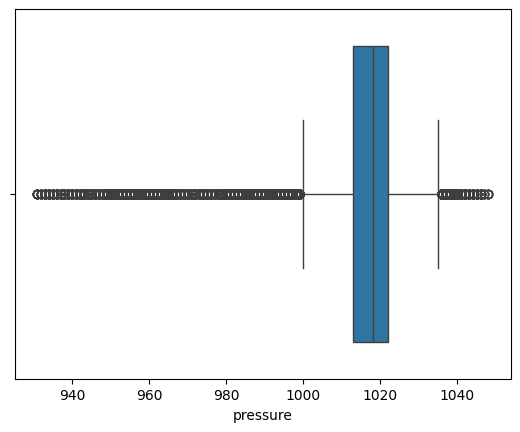

In [ ]:
weather.loc[weather.pressure > 1051, 'pressure'] = np.nan
weather.loc[weather.pressure < 931, 'pressure'] = np.nan


sns.boxplot(x=weather['pressure'])
plt.show()

In [ ]:
weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

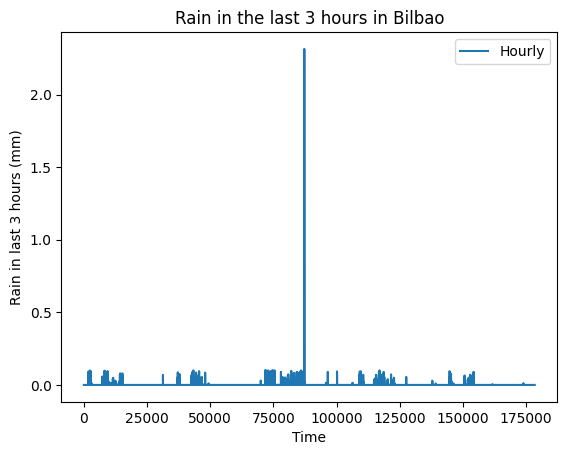

In [ ]:
def plot_series(weather, column, label=None, ylabel=None, title=None):
    if column not in weather.columns:
        raise ValueError(f"Column '{column}' not found in weather DataFrame.")
    plt.plot(weather.index, weather[column], label=label)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

# Plot the rain_3h_Bilbao series
ax = plot_series(weather, 'rain_3h',
                   label='Hourly', ylabel='Rain in last 3 hours (mm)',
                   title='Rain in the last 3 hours in Bilbao')
plt.show()

In [ ]:

selected_features = weather[['temp', 'humidity', 'wind_speed']]


k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
weather['cluster'] = kmeans.fit_predict(selected_features)
print(weather['cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    82763
2    61633
1    34000
Name: cluster, dtype: int64
